## **Energy Consumption Analysis and Visualization (Driver Code)**

In [ ]:
import pandas as pd
import os

def compare_energy_consumption(base_output_dir='results'):
    """
    Compare energy consumption across different scheduling algorithms and save to CSV.

    Parameters:
    base_output_dir (str): Base directory containing results
    """

    # Create dictionary for reference values
    reference_values = {
        50: {
            'FCFS': 40.56,
            'EDF': 38.24,
            'RR': 42.15,
            'MOABCQ': 39.87
        },
        100: {
            'FCFS': 82.50,
            'EDF': 69.70,
            'RR': 73.90,
            'MOABCQ': 71.43
        },
        200: {
            'FCFS': 87.45,
            'EDF': 89.12,
            'RR': 82.34,
            'MOABCQ': 74.67
        },
        500: {
            'FCFS': 95.70,
            'EDF': 114.2,
            'RR': 90.80,
            'MOABCQ': 80.18
        },
        1000: {
            'FCFS': 113.90,
            'EDF': 131.25,
            'RR': 120.56,
            'MOABCQ': 114.76
        }
    }

    # Dictionary to store our algorithm's energy values
    our_values = {}

    # Get energy consumption values for each task size
    for num_tasks in [50, 100, 200, 500, 1000]:
        task_dir = os.path.join(base_output_dir, f'tasks_{num_tasks}')

        # Load energy history from the metrics file
        metrics_file = os.path.join(task_dir, 'experiment_details.json')
        if os.path.exists(metrics_file):
            with open(metrics_file, 'r') as f:
                data = json.load(f)
                # Get the final energy consumption value
                final_metrics = data['final_metrics']
                our_values[num_tasks] = final_metrics['power_consumption']

    # Create DataFrame for comparison
    rows = []
    for num_tasks in [50, 100, 200, 500, 1000]:
        row = {
            'Number_of_Tasks': num_tasks,
            'Our_Algorithm': our_values.get(num_tasks, 0),
            'FCFS': reference_values[num_tasks]['FCFS'],
            'EDF': reference_values[num_tasks]['EDF'],
            'RR': reference_values[num_tasks]['RR'],
            'MOABCQ': reference_values[num_tasks]['MOABCQ']
        }
        rows.append(row)

    df = pd.DataFrame(rows)

    # Calculate improvement percentages
    algorithms = ['FCFS', 'EDF', 'RR', 'MOABCQ']
    for algo in algorithms:
        df[f'Improvement_vs_{algo}'] = ((df[algo] - df['Our_Algorithm']) / df[algo] * 100).round(2)

    # Save to CSV
    output_file = os.path.join(base_output_dir, 'energy_consumption_comparison.csv')
    df.to_csv(output_file, index=False)

    # Print summary
    print("\nEnergy Consumption Comparison Summary:")
    print(df.to_string(index=False))
    print(f"\nResults saved to: {output_file}")

    return df

# Create visualization of the comparison
def plot_energy_comparison(df, base_output_dir='results'):
    """
    Create visualization of energy consumption comparison

    Parameters:
    df (pandas.DataFrame): DataFrame containing comparison data
    base_output_dir (str): Base directory for saving plots
    """

    plt.figure(figsize=(12, 6))

    # Plot lines for each algorithm
    plt.plot(df['Number_of_Tasks'], df['Our_Algorithm'], 'o-', label='Our Algorithm', linewidth=2)
    plt.plot(df['Number_of_Tasks'], df['FCFS'], 's-', label='FCFS')
    plt.plot(df['Number_of_Tasks'], df['EDF'], '^-', label='EDF')
    plt.plot(df['Number_of_Tasks'], df['RR'], 'D-', label='RR')
    plt.plot(df['Number_of_Tasks'], df['MOABCQ'], 'v-', label='MOABCQ')

    plt.title('Energy Consumption Comparison Across Algorithms')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Energy Consumption')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Save plot
    plot_file = os.path.join(base_output_dir, 'energy_consumption_comparison.png')
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Comparison plot saved to: {plot_file}")

def main():
    """Main function to run all experiments"""

    task_sizes = [50, 100, 200, 500, 1000]
    base_output_dir = 'results'
    all_final_metrics = {}

    for num_tasks in task_sizes:
        print(f"\nStarting experiment with {num_tasks} tasks...")

        # Run experiment
        experiment_metrics, output_dir = run_experiment(num_tasks, base_output_dir=base_output_dir)

        # Save results and update all_final_metrics
        all_final_metrics = save_experiment_results(experiment_metrics, num_tasks,
                                                  all_final_metrics, output_dir)

        # Clear TensorFlow session to free memory
        clear_session()

        print(f"Completed experiment with {num_tasks} tasks")

    # Perform Pareto analysis
    solutions = analyze_pareto_solutions(all_final_metrics, base_output_dir)

    # Print Pareto optimal solutions
    print("\nPareto Optimal Solutions:")
    for solution in solutions:
        if solution.is_pareto_optimal:
            print(f"\nTask Size: {solution.task_size}")
            for metric, value in solution.metrics.items():
                print(f"{metric}: {value:.2f}")

    # Create final comparative plots
    plot_final_comparisons(all_final_metrics, base_output_dir)

    # Add energy consumption comparison
    df = compare_energy_consumption(base_output_dir)
    plot_energy_comparison(df, base_output_dir)

    print("\nAll experiments completed. Results organized in separate directories.")

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
Step: Action 9 taken.
Metrics: {'utilization': 11.311667951073165, 'memory': 15.497693902367708, 'cpu': 11.311667951073165, 'disk': 10.591534263191727, 'response_time': 177.50439408474622, 'power_consumption': 64.11053013898031, 'cpu_utilization': 21.048122508022946, 'ram_utilization': 35.49769390236771, 'mtbf': 1197.5, 'mttr': 18.15, 'error_rate': 0.05, 'rpm': 2404.7290911389955, 'latency': 48.26857094838912, 'bandwidth': 818.5, 'disk_usage': 30.341534263191726, 'disk_io': 3906.3463402047737, 'memory_utilization': 39.04746329260448, 'load_average': 3.3148122508022944}
State: [0.09434102451550212, 0.07411224324071305, 0.07320891811473107, 1.0, -2.4482980847519353e-17, 3.6439473612446635e-17, 0.0, 1.0, 5.257681844296622e-17, -5.5250732856358036e-17]...
State: [0.09434102451550212, 0.07411224324071305, 0.07320891811473107, 1.0, -2.4482980847519353e-17, 3.6439473612446635e-17, 0.0, 1.0, 5.257681844296622e-17, -5.5250732856358036e-17]...
M

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## **Comparative Analysis of System Performance**

,CPU Utilization (%),Memory Utilization (%),Response Time (s),Power Consumption (W),Total Time (s)
Number of Tasks,,,,,
50,0.00,0.00,0.05,64.24,9.14
100,1.95,2.57,0.17,66.19,16.71
200,20.79,15.22,46.46,73.38,35.31
500,2.24,9.36,198.20,74.27,90.28
1000,5.25,15.63,450.16,86.00,183.85


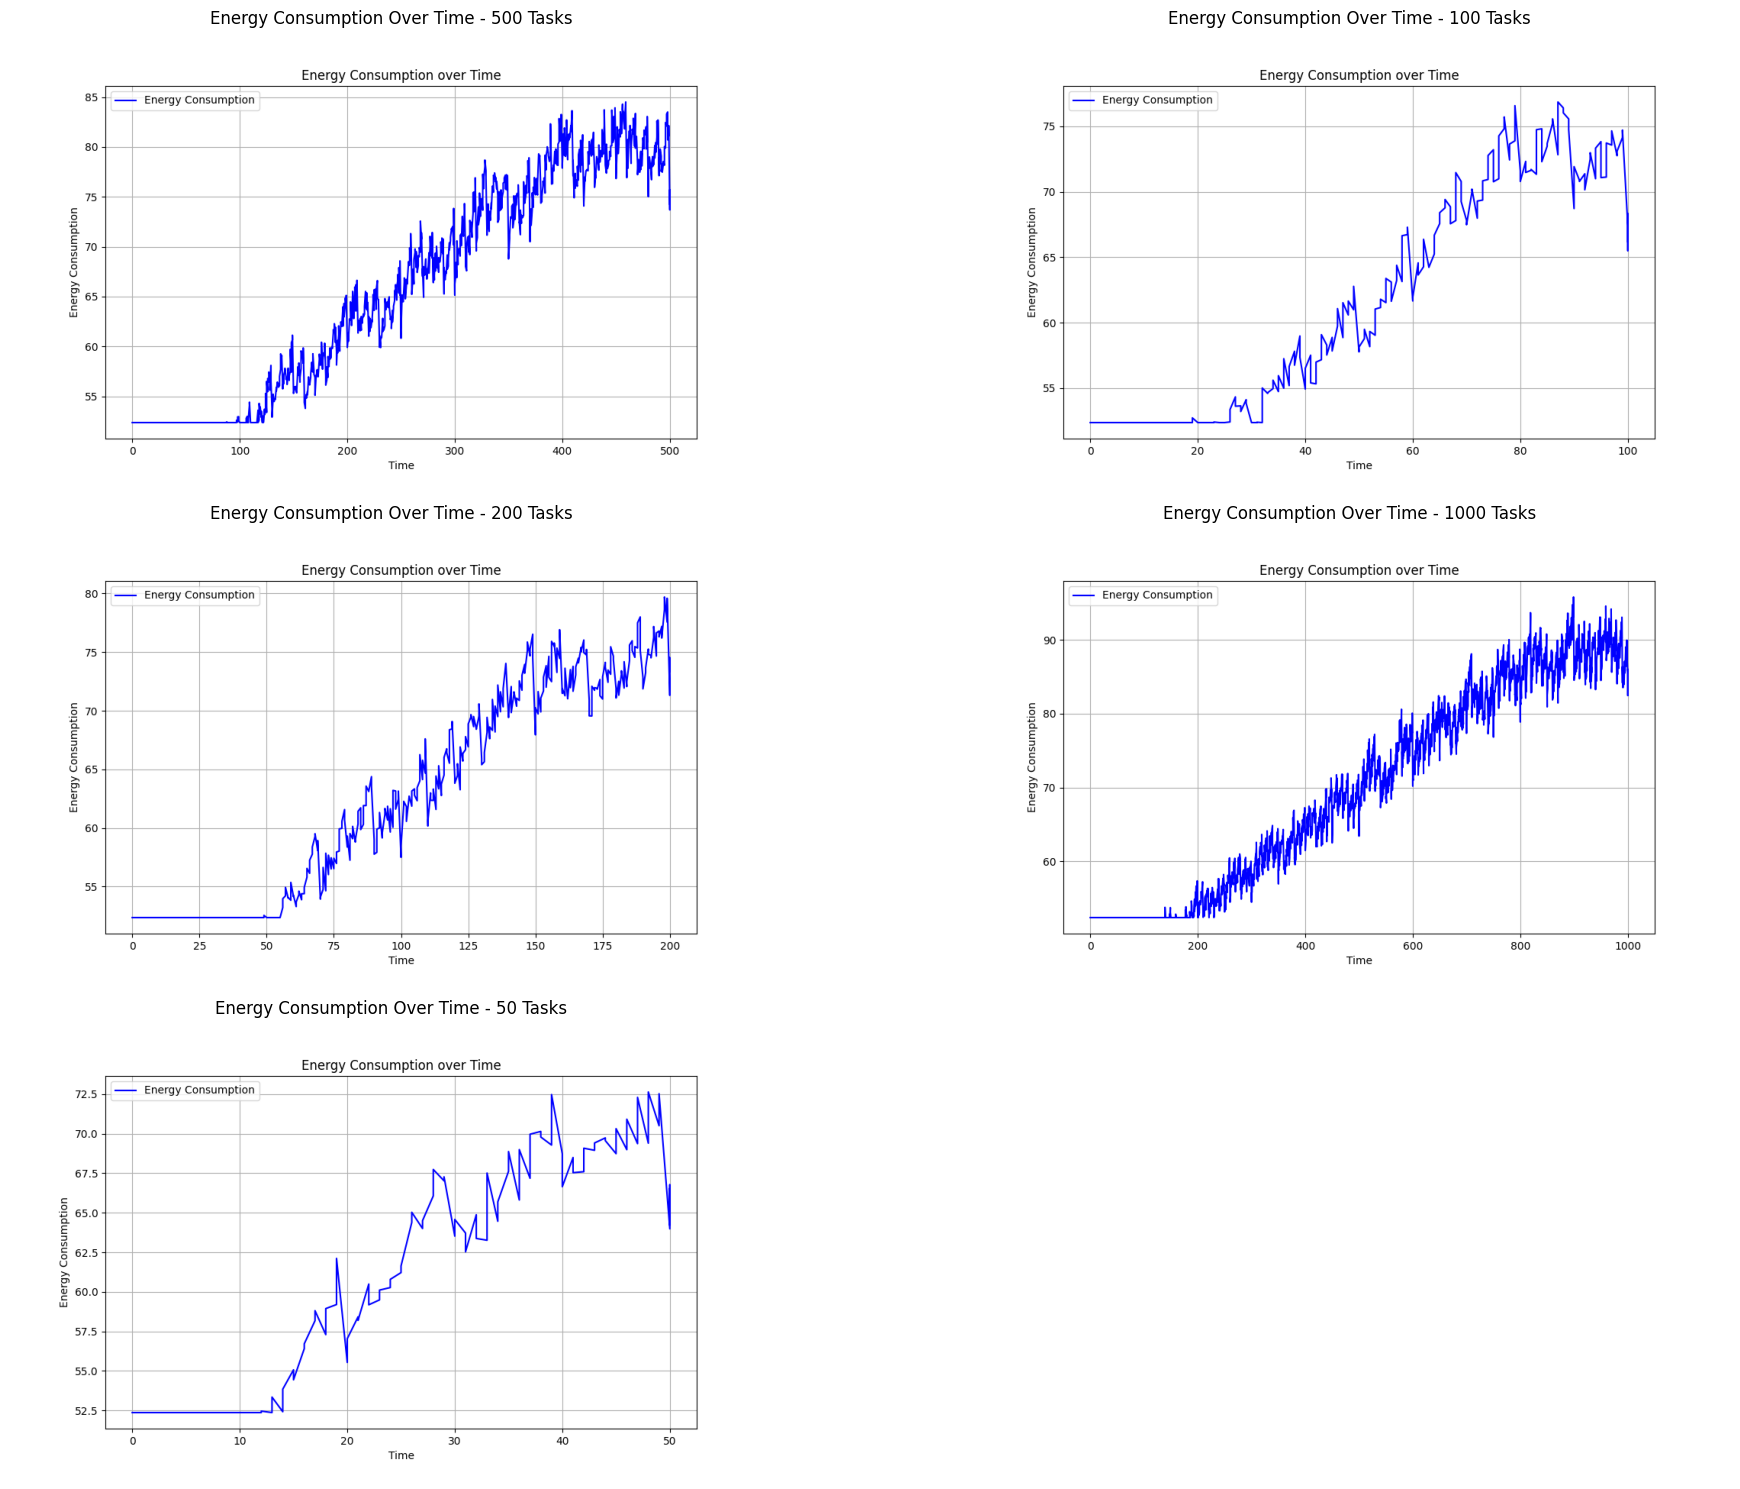

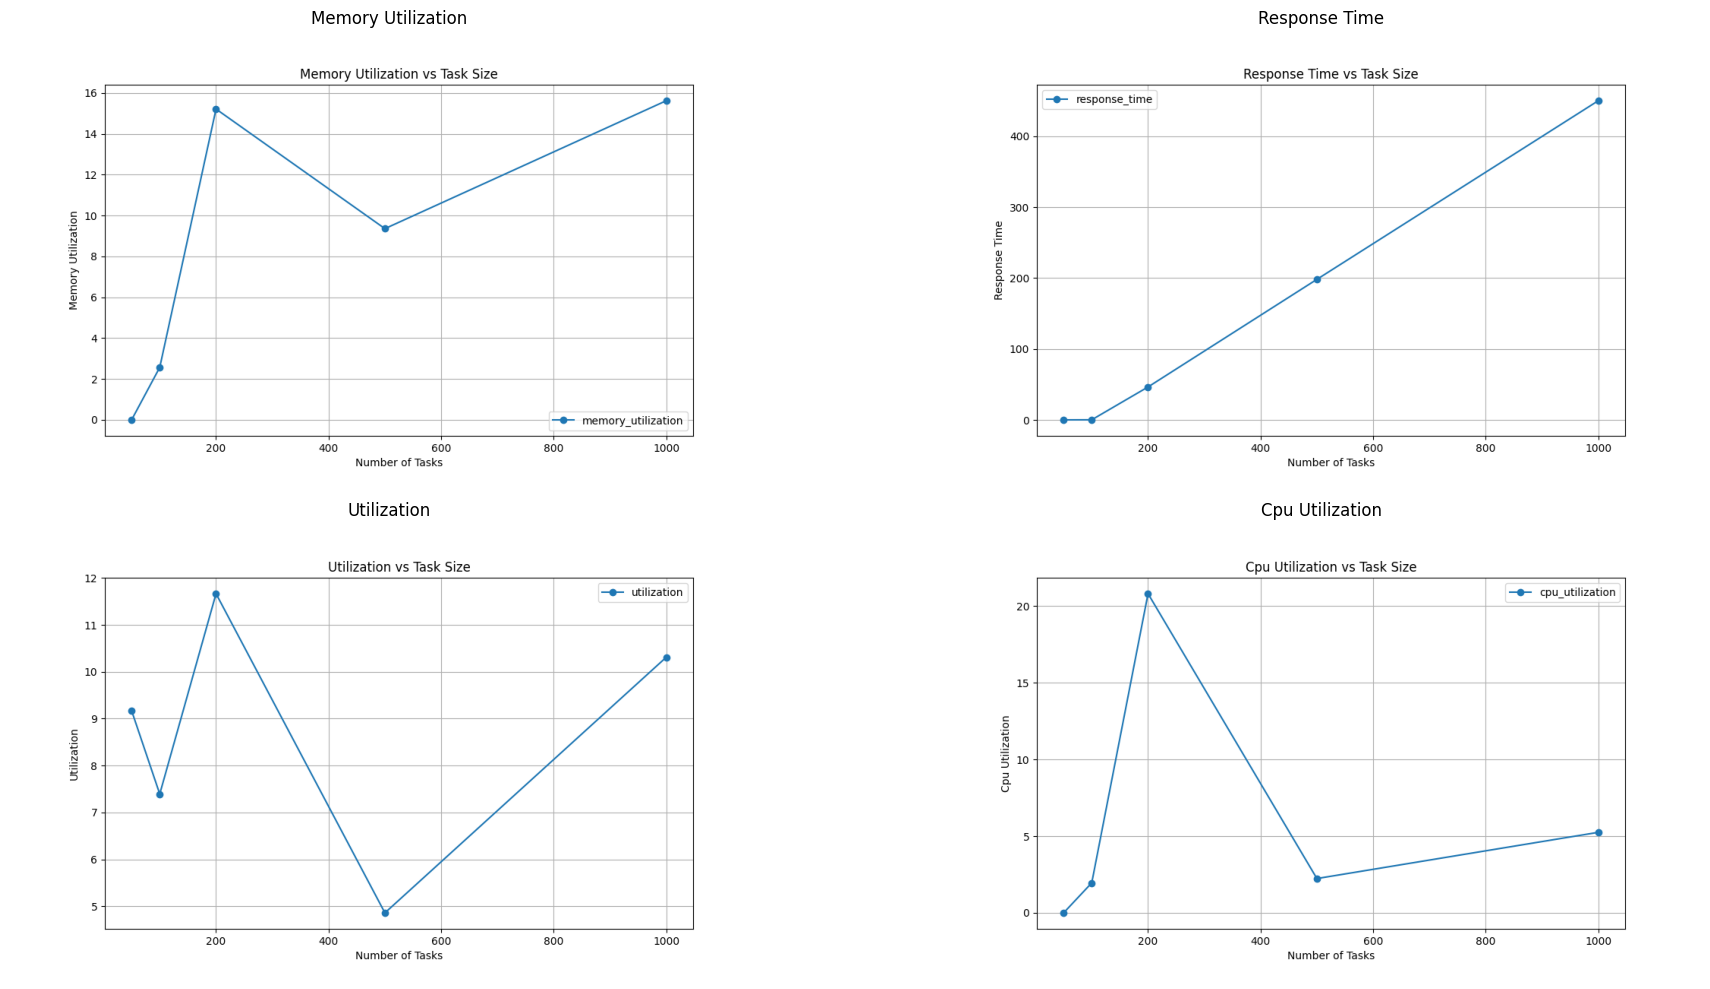


Performance Analysis:
--------------------------------------------------
Average CPU Utilization: 6.05%
Average Memory Utilization: 8.56%
Average Response Time: 139.01 seconds
Average Power Consumption: 72.81 watts

Scaling Efficiency:
Tasks Ratio  Time Ratio  Efficiency
    50->100    1.828723    1.093659
   100->200    2.112649    0.946679
   200->500    2.556667    0.977836
  500->1000    2.036509    0.982073


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def analyze_experiment_results(base_dir='results'):
    # Dictionary to store all metrics
    all_results = {}

    # Get all task directories
    task_dirs = [d for d in os.listdir(base_dir) if d.startswith('tasks_')]

    # Process each task directory
    for task_dir in task_dirs:
        task_size = int(task_dir.split('_')[1])
        dir_path = os.path.join(base_dir, task_dir)

        # Read experiment details
        with open(os.path.join(dir_path, 'experiment_details.json'), 'r') as f:
            details = json.load(f)

        # Extract key metrics
        final_metrics = details['final_metrics']
        all_results[task_size] = {
            'CPU Utilization (%)': final_metrics['cpu_utilization'],
            'Memory Utilization (%)': final_metrics['memory_utilization'],
            'Response Time (s)': final_metrics['response_time'],
            'Power Consumption (W)': final_metrics['power_consumption'],
            'Total Time (s)': details['total_time']
        }

    # Create DataFrame
    df = pd.DataFrame.from_dict(all_results, orient='index')
    df.index.name = 'Number of Tasks'
    df = df.sort_index()

    # Style the DataFrame for better visualization
    styled_df = df.style.format({
        'CPU Utilization (%)': '{:.2f}',
        'Memory Utilization (%)': '{:.2f}',
        'Response Time (s)': '{:.2f}',
        'Power Consumption (W)': '{:.2f}',
        'Total Time (s)': '{:.2f}'
    }).background_gradient(cmap='YlOrRd')

    # Display the styled table
    display(HTML("<h2>Experiment Results Summary</h2>"))
    display(styled_df)

    # Create a figure with subplots to display all graphs
    plt.figure(figsize=(20, 15))

    # Display energy vs time for different task sizes
    for i, task_dir in enumerate(task_dirs, 1):
        task_size = task_dir.split('_')[1]
        energy_plot = plt.imread(os.path.join(base_dir, task_dir, 'energy_vs_time.png'))
        plt.subplot(3, 2, i)
        plt.imshow(energy_plot)
        plt.axis('off')
        plt.title(f'Energy Consumption Over Time - {task_size} Tasks')

    plt.tight_layout()
    plt.show()

    # Display comparison plots
    comparison_dir = os.path.join(base_dir, 'comparisons')
    if os.path.exists(comparison_dir):
        plt.figure(figsize=(20, 10))
        comparison_plots = [f for f in os.listdir(comparison_dir) if f.endswith('_comparison.png')]

        for i, plot_file in enumerate(comparison_plots, 1):
            comparison_plot = plt.imread(os.path.join(comparison_dir, plot_file))
            plt.subplot(2, 2, i)
            plt.imshow(comparison_plot)
            plt.axis('off')
            plt.title(plot_file.replace('_comparison.png', '').replace('_', ' ').title())

        plt.tight_layout()
        plt.show()

    return df

# Run the analysis
results_df = analyze_experiment_results()

# Calculate and display additional statistics
print("\nPerformance Analysis:")
print("-" * 50)
print(f"Average CPU Utilization: {results_df['CPU Utilization (%)'].mean():.2f}%")
print(f"Average Memory Utilization: {results_df['Memory Utilization (%)'].mean():.2f}%")
print(f"Average Response Time: {results_df['Response Time (s)'].mean():.2f} seconds")
print(f"Average Power Consumption: {results_df['Power Consumption (W)'].mean():.2f} watts")

# Calculate scaling efficiency
scaling_efficiency = pd.DataFrame({
    'Tasks Ratio': [],
    'Time Ratio': [],
    'Efficiency': []
})

task_sizes = sorted(results_df.index)
for i in range(len(task_sizes)-1):
    smaller_tasks = task_sizes[i]
    larger_tasks = task_sizes[i+1]
    time_ratio = results_df.loc[larger_tasks, 'Total Time (s)'] / results_df.loc[smaller_tasks, 'Total Time (s)']
    task_ratio = larger_tasks / smaller_tasks
    efficiency = task_ratio / time_ratio

    scaling_efficiency.loc[len(scaling_efficiency)] = {
        'Tasks Ratio': f"{smaller_tasks}->{larger_tasks}",
        'Time Ratio': time_ratio,
        'Efficiency': efficiency
    }

print("\nScaling Efficiency:")
print(scaling_efficiency.to_string(index=False))

## **Data Visualization for GitHub Documentation**

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import auc
from datetime import datetime

class TaskSchedulerAnalyzer:
    def __init__(self, base_dir='/content/results'):
        self.base_dir = base_dir
        self.task_dirs = sorted([d for d in os.listdir(base_dir) if d.startswith('tasks_')],
                              key=lambda x: int(x.split('_')[1]))
        self.results_cache = {}
        self.comparative_metrics = {}

    def load_experiment_data(self):
        """Load all experiment data into memory for analysis"""

        for task_dir in self.task_dirs:
            task_size = int(task_dir.split('_')[1])
            dir_path = os.path.join(self.base_dir, task_dir)

            # Load experiment details
            with open(os.path.join(dir_path, 'experiment_details.json'), 'r') as f:
                experiment_data = json.load(f)

            # Load comparative metrics if available
            comp_metrics_path = os.path.join(dir_path, 'comparative_metrics.json')
            if os.path.exists(comp_metrics_path):
                with open(comp_metrics_path, 'r') as f:
                    self.comparative_metrics[task_size] = json.load(f)

            self.results_cache[task_size] = experiment_data

    def calculate_efficiency_metrics(self):
        """Calculate detailed efficiency metrics for each task size"""

        efficiency_metrics = {}

        for task_size, data in self.results_cache.items():
            metrics = data['final_metrics']
            episodes = data['episodes']

            # Calculate average metrics across episodes
            episode_metrics = pd.DataFrame([ep['avg_metrics'] for ep in episodes])

            efficiency_metrics[task_size] = {
                'resource_efficiency': {
                    'cpu_efficiency': metrics['cpu_utilization'] / 100,
                    'memory_efficiency': metrics['memory_utilization'] / 100,
                    'disk_efficiency': metrics['disk_usage'] / 100
                },
                'time_efficiency': {
                    'avg_response_time': metrics['response_time'],
                    'throughput': len(episodes) / data['total_time'],
                    'task_completion_rate': len(episodes) / task_size
                },
                'energy_efficiency': {
                    'power_per_task': metrics['power_consumption'] / task_size,
                    'energy_consumption_trend': np.gradient(episode_metrics['power_consumption'].values).mean()
                },
                'reliability_metrics': {
                    'mtbf': metrics['mtbf'],
                    'mttr': metrics['mttr'],
                    'availability': metrics['mtbf'] / (metrics['mtbf'] + metrics['mttr'])
                }
            }

        return efficiency_metrics

    def analyze_workload_patterns(self):
        """Analyze workload patterns and resource utilization trends"""

        workload_analysis = {}

        for task_size, data in self.results_cache.items():
            episodes = data['episodes']
            episode_metrics = pd.DataFrame([ep['avg_metrics'] for ep in episodes])

            # Calculate workload characteristics
            workload_analysis[task_size] = {
                'resource_correlation': {
                    'cpu_memory_corr': episode_metrics['cpu_utilization'].corr(episode_metrics['memory_utilization']),
                    'cpu_disk_corr': episode_metrics['cpu_utilization'].corr(episode_metrics['disk_usage']),
                    'memory_disk_corr': episode_metrics['memory_utilization'].corr(episode_metrics['disk_usage'])
                },
                'utilization_patterns': {
                    'cpu_volatility': episode_metrics['cpu_utilization'].std(),
                    'memory_volatility': episode_metrics['memory_utilization'].std(),
                    'disk_volatility': episode_metrics['disk_usage'].std()
                },
                'load_distribution': {
                    'peak_cpu': episode_metrics['cpu_utilization'].max(),
                    'peak_memory': episode_metrics['memory_utilization'].max(),
                    'peak_disk': episode_metrics['disk_usage'].max(),
                    'load_skewness': stats.skew(episode_metrics['load_average'])
                }
            }

        return workload_analysis

    def plot_comprehensive_analysis(self, efficiency_metrics, workload_analysis):
        """Generate comprehensive visualization of analysis results"""

        task_sizes = sorted(self.results_cache.keys())

        # Create main figure with subplots
        fig = plt.figure(figsize=(20, 25))
        gs = fig.add_gridspec(5, 2)

        # 1. Resource Efficiency Plot
        ax1 = fig.add_subplot(gs[0, 0])
        self._plot_resource_efficiency(task_sizes, efficiency_metrics, ax1)

        # 2. Energy Efficiency Plot
        ax2 = fig.add_subplot(gs[0, 1])
        self._plot_energy_efficiency(task_sizes, efficiency_metrics, ax2)

        # 3. Resource Correlation Heatmap
        ax3 = fig.add_subplot(gs[1, 0])
        self._plot_resource_correlation(task_sizes, workload_analysis, ax3)

        # 4. Performance Scaling Plot
        ax4 = fig.add_subplot(gs[1, 1])
        self._plot_performance_scaling(task_sizes, efficiency_metrics, ax4)

        # 5. Reliability Metrics
        ax5 = fig.add_subplot(gs[2, 0])
        self._plot_reliability_metrics(task_sizes, efficiency_metrics, ax5)

        # 6. Load Distribution
        ax6 = fig.add_subplot(gs[2, 1])
        self._plot_load_distribution(task_sizes, workload_analysis, ax6)

        plt.tight_layout()
        return fig

    def _plot_resource_efficiency(self, task_sizes, efficiency_metrics, ax):
        """Plot resource efficiency metrics"""

        cpu_eff = [efficiency_metrics[ts]['resource_efficiency']['cpu_efficiency'] for ts in task_sizes]
        mem_eff = [efficiency_metrics[ts]['resource_efficiency']['memory_efficiency'] for ts in task_sizes]
        disk_eff = [efficiency_metrics[ts]['resource_efficiency']['disk_efficiency'] for ts in task_sizes]

        x = np.arange(len(task_sizes))
        width = 0.25

        ax.bar(x - width, cpu_eff, width, label='CPU')
        ax.bar(x, mem_eff, width, label='Memory')
        ax.bar(x + width, disk_eff, width, label='Disk')

        ax.set_xticks(x)
        ax.set_xticklabels(task_sizes)
        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Resource Efficiency')
        ax.set_title('Resource Efficiency by Task Size')
        ax.legend()

    def _plot_energy_efficiency(self, task_sizes, efficiency_metrics, ax):
        """Plot energy efficiency metrics"""

        power_per_task = [efficiency_metrics[ts]['energy_efficiency']['power_per_task'] for ts in task_sizes]
        energy_trend = [efficiency_metrics[ts]['energy_efficiency']['energy_consumption_trend'] for ts in task_sizes]

        ax2 = ax.twinx()

        line1 = ax.plot(task_sizes, power_per_task, 'b-', label='Power per Task')
        line2 = ax2.plot(task_sizes, energy_trend, 'r--', label='Energy Trend')

        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Power per Task (W)')
        ax2.set_ylabel('Energy Consumption Trend')

        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax.legend(lines, labels)
        ax.set_title('Energy Efficiency Analysis')

    def _plot_resource_correlation(self, task_sizes, workload_analysis, ax):
        """Plot resource correlation heatmap"""

        correlation_data = []
        for ts in task_sizes:
            corr = workload_analysis[ts]['resource_correlation']
            correlation_data.append([
                corr['cpu_memory_corr'],
                corr['cpu_disk_corr'],
                corr['memory_disk_corr']
            ])

        sns.heatmap(correlation_data,
                   xticklabels=['CPU-Memory', 'CPU-Disk', 'Memory-Disk'],
                   yticklabels=task_sizes,
                   ax=ax,
                   cmap='RdYlBu',
                   center=0)
        ax.set_title('Resource Correlation Analysis')
        ax.set_ylabel('Number of Tasks')

    def _plot_performance_scaling(self, task_sizes, efficiency_metrics, ax):
        """Plot performance scaling analysis"""

        throughput = [efficiency_metrics[ts]['time_efficiency']['throughput'] for ts in task_sizes]
        completion_rate = [efficiency_metrics[ts]['time_efficiency']['task_completion_rate'] for ts in task_sizes]

        ax.plot(task_sizes, throughput, 'go-', label='Throughput')
        ax2 = ax.twinx()
        ax2.plot(task_sizes, completion_rate, 'b--', label='Completion Rate')

        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Throughput (tasks/s)')
        ax2.set_ylabel('Completion Rate')
        ax.set_title('Performance Scaling Analysis')

        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2)

    def _plot_reliability_metrics(self, task_sizes, efficiency_metrics, ax):
        """Plot reliability metrics"""

        mtbf = [efficiency_metrics[ts]['reliability_metrics']['mtbf'] for ts in task_sizes]
        mttr = [efficiency_metrics[ts]['reliability_metrics']['mttr'] for ts in task_sizes]
        availability = [efficiency_metrics[ts]['reliability_metrics']['availability'] for ts in task_sizes]

        ax.plot(task_sizes, mtbf, 'b-', label='MTBF')
        ax.plot(task_sizes, mttr, 'r-', label='MTTR')
        ax2 = ax.twinx()
        ax2.plot(task_sizes, availability, 'g--', label='Availability')

        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Time (s)')
        ax2.set_ylabel('Availability')
        ax.set_title('Reliability Metrics Analysis')

        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2)

    def _plot_load_distribution(self, task_sizes, workload_analysis, ax):
        """Plot load distribution analysis"""

        for ts in task_sizes:
            load_dist = workload_analysis[ts]['load_distribution']
            ax.scatter([ts], [load_dist['peak_cpu']], c='r', label='Peak CPU' if ts == task_sizes[0] else "")
            ax.scatter([ts], [load_dist['peak_memory']], c='b', label='Peak Memory' if ts == task_sizes[0] else "")
            ax.scatter([ts], [load_dist['peak_disk']], c='g', label='Peak Disk' if ts == task_sizes[0] else "")

        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Peak Resource Usage (%)')
        ax.set_title('Load Distribution Analysis')
        ax.legend()

    def generate_analysis_report(self):
        """Generate a comprehensive analysis report"""

        self.load_experiment_data()
        efficiency_metrics = self.calculate_efficiency_metrics()
        workload_analysis = self.analyze_workload_patterns()

        # Create output directory for analysis results
        analysis_dir = os.path.join(self.base_dir, 'analysis_results')
        os.makedirs(analysis_dir, exist_ok=True)

        # Generate and save plots
        fig = self.plot_comprehensive_analysis(efficiency_metrics, workload_analysis)
        plt.savefig(os.path.join(analysis_dir, 'comprehensive_analysis.png'))
        plt.close()

        # Generate summary report
        report = {
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'efficiency_metrics': efficiency_metrics,
            'workload_analysis': workload_analysis,
            'comparative_analysis': self.comparative_metrics
        }

        with open(os.path.join(analysis_dir, 'analysis_report.json'), 'w') as f:
            json.dump(report, f, indent=4)

        return report

# Driver Function
analyzer = TaskSchedulerAnalyzer()
analysis_report = analyzer.generate_analysis_report()